## Estimacion de modelo de regresion lineal mediante OLS

Se puede estimar de manera univariada y tambien multivariada. El modelo clasico tiene `seis supuestos`:
1. Coeficientes deben ser lineal en parametros
2. Condicional del error/residuo debe ser igual a cero. Se cumple si no hay endogeneidad.
3. Perturbaciones no esfericas: no existe heterocedasticidad ni autocorrelacion
4. La variable X se mantiene fija en muestras repetidas
5. Errores se distribuyen de manera normal
6. Numero de observaciones debe ser mayor al numero de variables 

Para el estudio se usara un set de juguete: https://www.statsmodels.org/dev/datasets/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import statsmodels.api as sm

In [2]:
dta = sm.datasets.webuse("auto")
dta.to_csv("../data/auto.csv")

dta["lnprice"] = np.log(dta["price"])
dta.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,lnprice
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic,8.318499
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic,8.465690
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic,8.242494
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic,8.479699
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic,8.965335


In [3]:
dta.shape

(74, 13)

Primero es importante observar que tipo de realizacion podemos encontrar entre una variable como `mpg` y el `price`

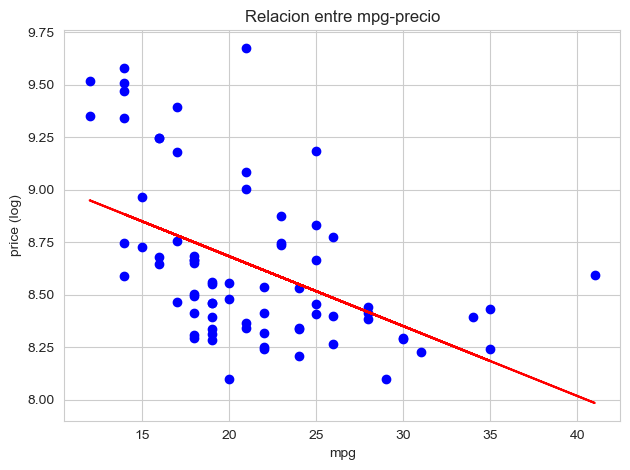

In [4]:
x=dta["mpg"] ; y=dta["lnprice"] ; fit=np.polyfit(x, y, deg=1)


plt.figure()

# Graficos
plt.scatter(x="mpg", y="lnprice", data=dta, color="blue")
plt.plot(x, fit[0]*x + fit[1], color="red")

# Titulo/ejes
plt.title("Relacion entre mpg-precio")
plt.xlabel("mpg")
plt.ylabel("price (log)")

# Guardado
plt.tight_layout()
plt.savefig("../figures/mpg-price.pdf")
plt.show()

### Modelo lineal univariado

In [5]:
X = dta[["mpg"]]
X = sm.add_constant(X)

y = dta["lnprice"]
y[0:5]

0    8.318499
1    8.465690
2    8.242494
3    8.479699
4    8.965335
Name: lnprice, dtype: float32

In [6]:
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     22.87
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           8.93e-06
Time:                        18:09:20   Log-Likelihood:                -25.011
No. Observations:                  74   AIC:                             54.02
Df Residuals:                      72   BIC:                             58.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3493      0.153     60.912      0.0

Algunos estadisticos:

In [7]:
print("R2: ", results.rsquared)
print("R2 ajustado: ", results.rsquared_adj)
print("MSE: ", results.mse_resid)

R2:  0.24108107891840913
R2 ajustado:  0.2305405383478315
MSE:  0.11830212338244678


In [8]:
print("AIC: ", np.round(results.aic, 3))
print("BIC: ", np.round(results.bic, 3))

AIC:  54.021
BIC:  58.63


In [9]:
print("T-Estadisticos: ", np.round(results.tvalues), 5)
print("")
print("P-values: ", np.round(results.pvalues), 5)

T-Estadisticos:  const    61.0
mpg      -5.0
dtype: float64 5

P-values:  const    0.0
mpg      0.0
dtype: float64 5


Dado el modelo: $$y = \alpha_0 + \alpha_1 X + \epsilon$$

Tras estimacion, se consigue: $$\hat{y} = \hat{\alpha_0} + \hat{\alpha_1}\hat{X}$$

Estos resultados se pueden conseguir mediante dos metodos:
1. Los parametros mediante `params`
2. La endog estimada mediante `predict()`

In [10]:
print("Parameters: ", results.params)

Parameters:  const    9.349342
mpg     -0.033277
dtype: float64


In [11]:
y_hat = results.predict()

print("R2: ", y_hat)

R2:  [8.61724872 8.78363359 8.61724872 8.68380267 8.85018754 8.75035662
 8.48414082 8.68380267 8.81691057 8.71707964 8.88346451 8.88346451
 8.65052569 8.3843099  8.81691057 8.61724872 8.61724872 8.55069477
 8.71707964 8.35103292 8.75035662 8.81691057 8.78363359 8.41758687
 8.65052569 8.95001846 8.95001846 8.88346451 8.61724872 8.88346451
 8.85018754 8.75035662 8.88346451 8.68380267 8.65052569 8.71707964
 8.71707964 8.75035662 8.71707964 8.55069477 8.81691057 8.41758687
 8.21792503 8.5174178  8.48414082 8.75035662 8.75035662 8.75035662
 8.71707964 8.71707964 8.71707964 8.55069477 8.78363359 8.58397174
 8.5174178  8.58397174 8.18464805 8.55069477 8.65052569 8.65052569
 8.5174178  8.41758687 8.35103292 8.88346451 8.48414082 8.18464805
 8.75035662 8.31775595 8.75035662 8.58397174 7.98498621 8.5174178
 8.5174178  8.78363359]


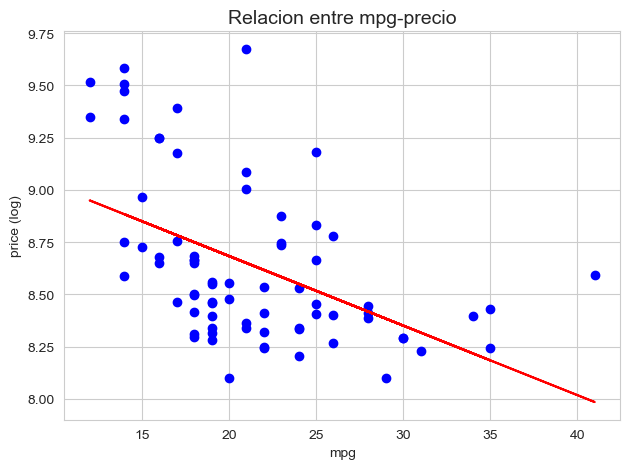

In [12]:
plt.figure()

# Graficos
plt.scatter(x="mpg", y="lnprice", data=dta, color="blue")
plt.plot(x, y_hat, color="red")

# Titulo/ejes
plt.title("Relacion entre mpg-precio", fontsize=14)
plt.xlabel("mpg")
plt.ylabel("price (log)")

# Guardado
plt.tight_layout()
plt.savefig("../figures/mpg-price.pdf")
plt.show()

Se puede conseguir tambien la matriz de varianzas y covarianzas de los coeficientes:

In [13]:
results.normalized_cov_params

,const,mpg
const,0.199142,-0.008716
mpg,-0.008716,0.000409


Los residuos se puede conseguir mediante el metodo `resid`. Se busca que estos sean distribuidos como una normal

<Figure size 640x480 with 0 Axes>

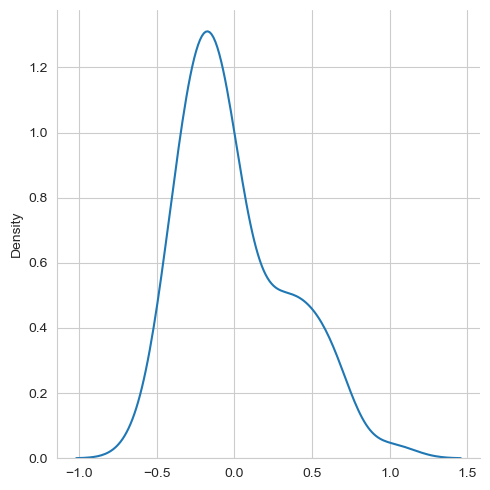

In [14]:
fig = plt.figure()

fig = sns.displot(results.resid, kind="kde")

plt.tight_layout()
plt.savefig("../figures/mpg-price-resid.pdf")
plt.show()

### Modelo lineal multivariado

In [15]:
dta = sm.datasets.webuse("auto")

dta["lnprice"] = np.log(dta["price"])
dta.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,lnprice
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic,8.318499
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic,8.465690
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic,8.242494
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic,8.479699
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic,8.965335


In [16]:
# Set
X = dta[["weight", "headroom"]]
X = sm.add_constant(X)

y = dta["lnprice"]
y[0:5]

0    8.318499
1    8.465690
2    8.242494
3    8.479699
4    8.965335
Name: lnprice, dtype: float32

In [17]:
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     16.86
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           1.02e-06
Time:                        18:09:22   Log-Likelihood:                -20.837
No. Observations:                  74   AIC:                             47.67
Df Residuals:                      71   BIC:                             54.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9460      0.170     46.752      0.0

In [18]:
print("R2 ajustado: ", np.round(results.rsquared_adj, 3))
print("AIC: ", np.round(results.aic, 3))
print("BIC: ", np.round(results.bic, 3))

R2 ajustado:  0.303
AIC:  47.674
BIC:  54.586


Los estadisticos de `R2-ajustado`, `AIC` y el `BIC` nos permiten entender si la inclusion de una variable es valiosa o no. En ese sentido, a la estimacion previa le incluiremos la variable `displacement`

In [19]:
X = dta[["weight", "headroom", "displacement"]]
X = sm.add_constant(X)

y = dta["lnprice"]

# Modelo
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     11.10
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           4.80e-06
Time:                        18:09:22   Log-Likelihood:                -20.821
No. Observations:                  74   AIC:                             49.64
Df Residuals:                      70   BIC:                             58.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.9676      0.211     37.766   

In [20]:
print("R2 ajustado: ", np.round(results.rsquared_adj, 3))
print("AIC: ", np.round(results.aic, 3))
print("BIC: ", np.round(results.bic, 3))

R2 ajustado:  0.293
AIC:  49.641
BIC:  58.857


Pese a que los criterios de informacion aun parecen mostrar que en terminos de comparativa entre complejidad del modelo y ganancia, aun seria importante la inclusion de la variable `displacement`, el `R2-ajustado` se reduce si la incluimos

### Testeo de hipotesis

In [21]:
X = dta[["weight", "headroom"]]
X = sm.add_constant(X)

y = dta["lnprice"]

# Modelo
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     16.86
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           1.02e-06
Time:                        18:09:22   Log-Likelihood:                -20.837
No. Observations:                  74   AIC:                             47.67
Df Residuals:                      71   BIC:                             54.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9460      0.170     46.752      0.0

In [22]:
r = np.zeros_like(results.params)

# Testing headroom (3) == 0
r[2:] = [1]
print(r)

T_test = results.t_test(r)
print(T_test)

[0. 0. 1.]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0916      0.052     -1.771      0.081      -0.195       0.012


In [23]:
R = np.zeros_like(results.params)

# Testing const (1) == weight (2) == 0
R[:2] = [1, -1]
print(R)

T_test = results.t_test(R)
print(T_test)

[ 1. -1.  0.]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             7.9457      0.170     46.742      0.000       7.607       8.285


In [24]:
R = np.array([
    [1, 0, 0],
    [0, 0, 1]
])

# Testing const (1) == 0, headroom (3) == 0
print(R)

T_test = results.t_test(R)
print(T_test)

[[1 0 0]
 [0 0 1]]
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             7.9460      0.170     46.752      0.000       7.607       8.285
c1            -0.0916      0.052     -1.771      0.081      -0.195       0.012


### Referencias:
* https://www.statsmodels.org/stable/api.html
* https://www.statsmodels.org/dev/datasets/index.html
* https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html